In [78]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.base import TransformerMixin
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, RobustScaler

np.random.seed(42)

dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
dataset.info()
dataset.isna().mean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies      0.0
Glucose          0.0
BloodPressure    0.0
SkinThickness    0.0
Insulin          0.0
BMI              0.0
Pedigree         0.0
Age              0.0
Outcome          0.0
dtype: float64

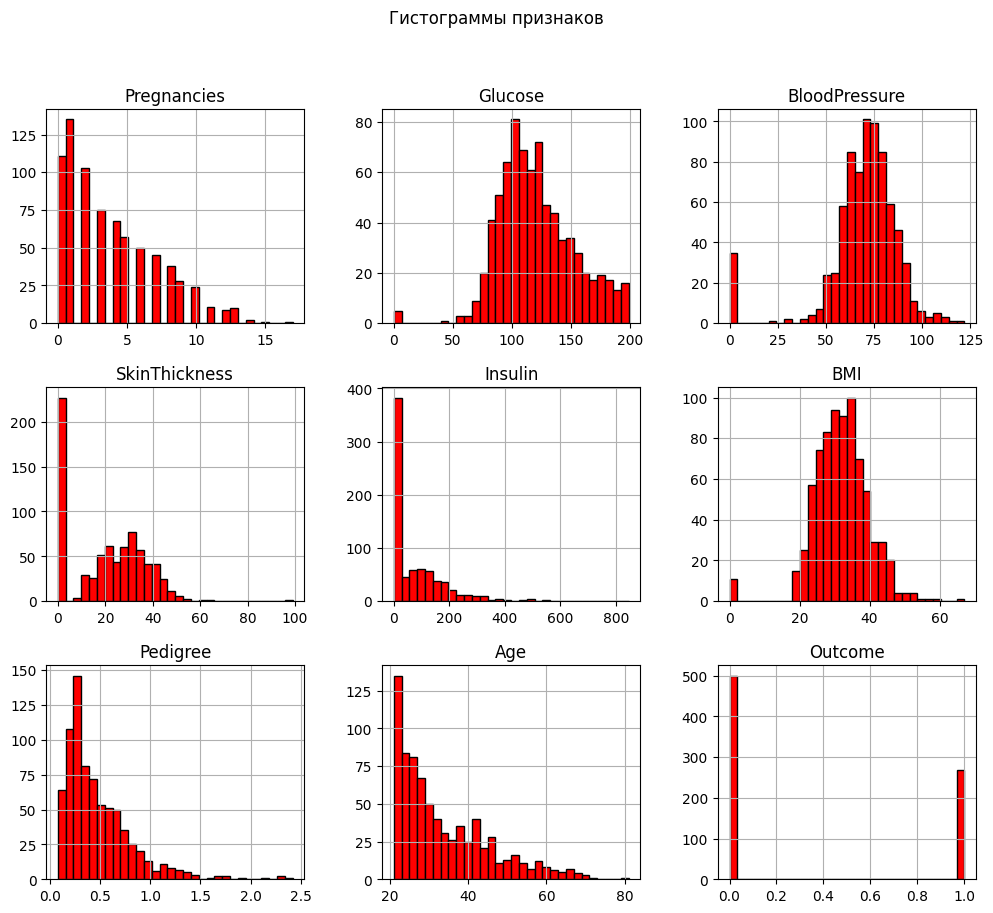

In [53]:
dataset.hist(bins=30, figsize=(12, 10), color='r', edgecolor='k')
plt.suptitle('Гистограммы признаков')
plt.show()

In [54]:
num_cols=dataset.columns[:-1].tolist()
dataset[num_cols].mean()

Pregnancies        3.845052
Glucose          120.894531
BloodPressure     69.105469
SkinThickness     20.536458
Insulin           79.799479
BMI               31.992578
Pedigree           0.471876
Age               33.240885
dtype: float64

In [55]:
dataset[num_cols].min()

Pregnancies       0.000
Glucose           0.000
BloodPressure     0.000
SkinThickness     0.000
Insulin           0.000
BMI               0.000
Pedigree          0.078
Age              21.000
dtype: float64

In [56]:
dataset[num_cols].max()

Pregnancies       17.00
Glucose          199.00
BloodPressure    122.00
SkinThickness     99.00
Insulin          846.00
BMI               67.10
Pedigree           2.42
Age               81.00
dtype: float64

In [57]:
dataset[num_cols].std()

Pregnancies        3.369578
Glucose           31.972618
BloodPressure     19.355807
SkinThickness     15.952218
Insulin          115.244002
BMI                7.884160
Pedigree           0.331329
Age               11.760232
dtype: float64

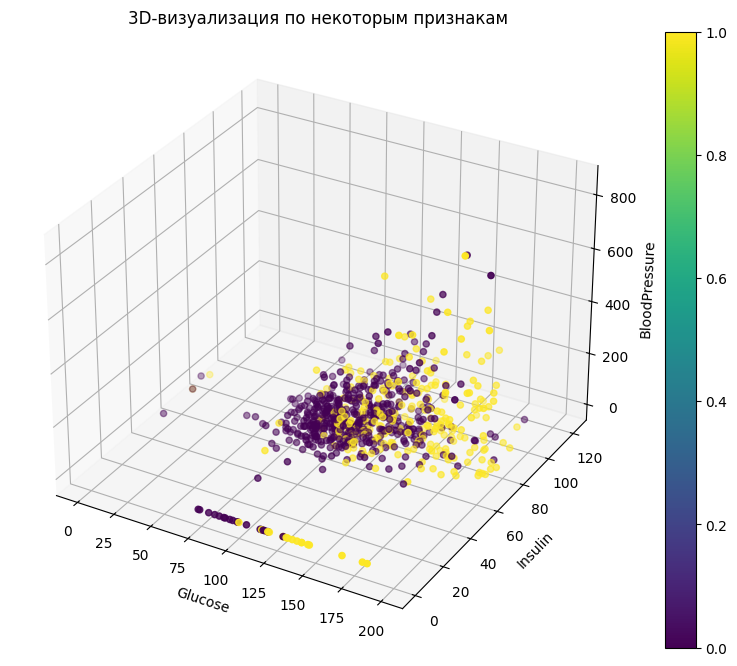

In [58]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(dataset['Glucose'], dataset['BloodPressure'], dataset['Insulin'], 
                c=dataset['Outcome'], cmap='viridis', marker='o')

ax.set_xlabel('Glucose')
ax.set_ylabel('Insulin')
ax.set_zlabel('BloodPressure')

plt.title('3D-визуализация по некоторым признакам')
plt.colorbar(sc) 
plt.show()


Посмотрим, построив матрицу корреляции, насколько сильно каждые два признака связаны друг с другом

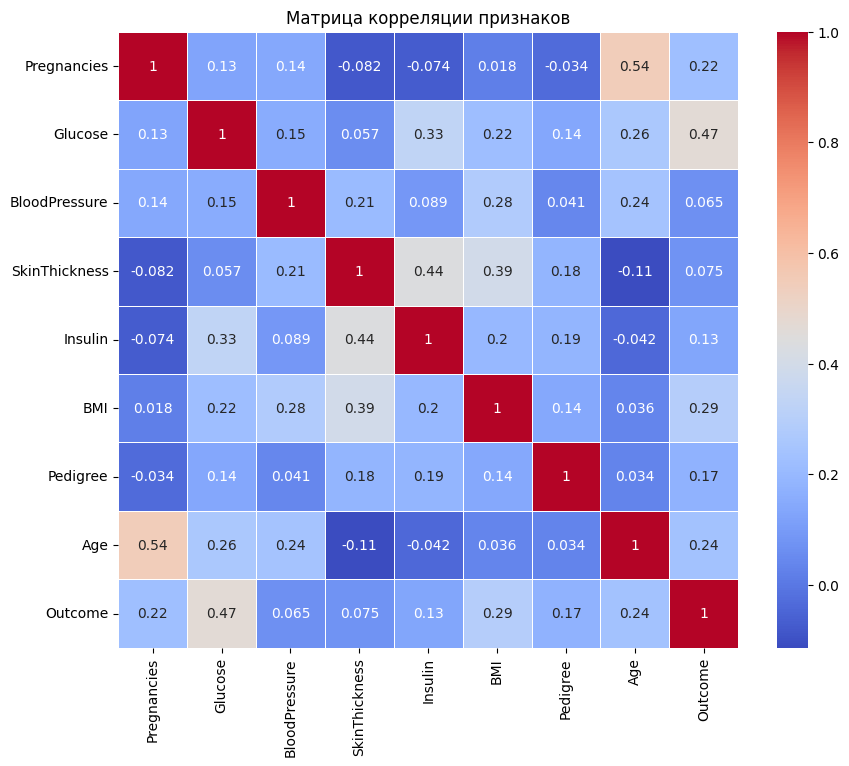

In [59]:
corr_matrix = dataset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Матрица корреляции признаков')
plt.show()

В наборе данных нет групп признаков, которые сильно коррелируют друг с другом, образуя "кластеры".

Нормируем данные

Z-score - Mean:
Pregnancies     -7.864080e-17
Glucose         -1.156482e-17
BloodPressure    1.272131e-17
SkinThickness    3.816392e-17
Insulin         -4.972874e-17
BMI              2.659909e-16
Pedigree         2.451743e-16
Age              2.035409e-16
dtype: float64

Z-score - Standard Deviation:
Pregnancies      1.0
Glucose          1.0
BloodPressure    1.0
SkinThickness    1.0
Insulin          1.0
BMI              1.0
Pedigree         1.0
Age              1.0
dtype: float64



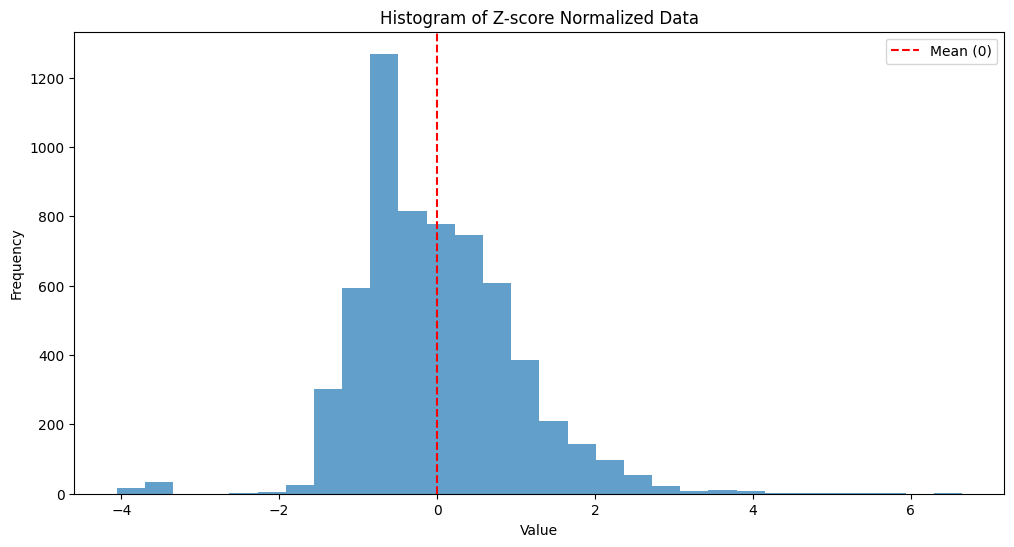

Min-Max - Mean:
Pregnancies      0.226180
Glucose          0.607510
BloodPressure    0.566438
SkinThickness    0.207439
Insulin          0.094326
BMI              0.476790
Pedigree         0.168179
Age              0.204015
dtype: float64

Min-Max - Standard Deviation:
Pregnancies      0.198210
Glucose          0.160666
BloodPressure    0.158654
SkinThickness    0.161134
Insulin          0.136222
BMI              0.117499
Pedigree         0.141473
Age              0.196004
dtype: float64



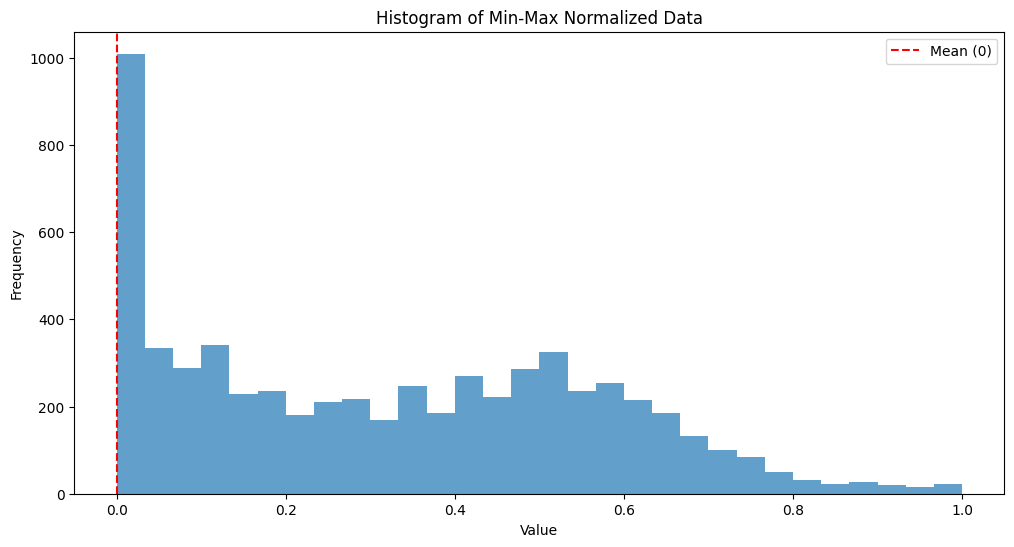

Robust Scaling - Mean:
Pregnancies      0.169010
Glucose          0.094413
BloodPressure   -0.160807
SkinThickness   -0.076986
Insulin          0.387422
BMI             -0.000798
Pedigree         0.259807
Age              0.249464
dtype: float64

Robust Scaling - Standard Deviation:
Pregnancies      0.673916
Glucose          0.775094
BloodPressure    1.075323
SkinThickness    0.498507
Insulin          0.905650
BMI              0.847759
Pedigree         0.866219
Age              0.691778
dtype: float64



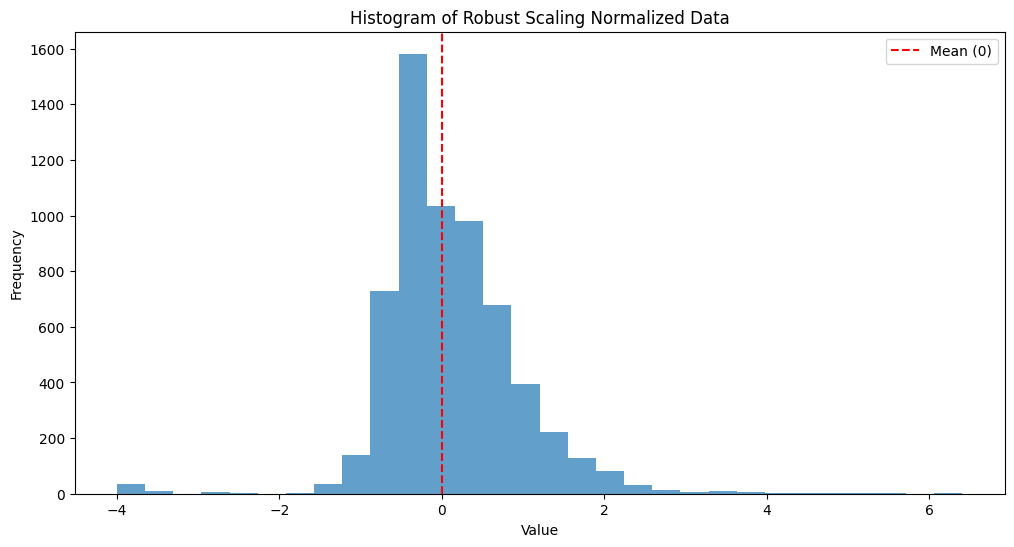

In [60]:
def normalize_data(dataset, num_cols):
    # Z-score Normalization
    z_score_normalized = (dataset[num_cols] - dataset[num_cols].mean()) / dataset[num_cols].std()
    
    # Min-Max Normalization
    min_max_scaler = MinMaxScaler()
    min_max_normalized = pd.DataFrame(min_max_scaler.fit_transform(dataset[num_cols]), columns=num_cols)
    
    # Robust Scaling
    robust_scaler = RobustScaler()
    robust_normalized = pd.DataFrame(robust_scaler.fit_transform(dataset[num_cols]), columns=num_cols)
    
    return z_score_normalized, min_max_normalized, robust_normalized

def evaluate_normalization(normalized_data, method_name):
    mean = normalized_data.mean()
    std_dev = normalized_data.std()
    
    print(f"{method_name} - Mean:\n{mean}\n")
    print(f"{method_name} - Standard Deviation:\n{std_dev}\n")
    
    plt.figure(figsize=(12, 6))
    plt.hist(normalized_data.values.flatten(), bins=30, alpha=0.7)
    plt.title(f"Histogram of {method_name} Normalized Data")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.axvline(x=0, color='r', linestyle='--', label='Mean (0)')
    plt.legend()
    plt.show()

z_score_normalized, min_max_normalized, robust_normalized = normalize_data(dataset, num_cols)
    
# Оценка нормализации
evaluate_normalization(z_score_normalized, "Z-score")
evaluate_normalization(min_max_normalized, "Min-Max")
evaluate_normalization(robust_normalized, "Robust Scaling")

Z-score нормализация будет предпочтительной, так как она позволяет сохранить информацию о стандартном отклонении.

In [61]:
class KNN:
    def __init__(self, k=3):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def euclidean_distance(self, x1, x2):
        iterable = ((x1[index] - x2[index])**2 for index in range(len(x1)))
        return np.sqrt(np.sum(np.fromiter(iterable, int)))
    
    def predict(self, X):
        y_pred = [self._predict(X.iloc[i].tolist()) for i in range(X.shape[0])]
        return np.array(y_pred)
    
    def _predict(self, x):
        distances = [self.euclidean_distance(x, self.X_train.iloc[j].tolist()) for j in range(self.X_train.shape[0])]
        
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

In [62]:
k_values = [3, 5, 10]

def train_features(X_train, X_test, y_train, y_test):
    results = []
    for k in k_values:
        model = KNN(k)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        accuracy = np.trace(cm) / np.sum(cm)
        results.append((k, cm, accuracy))
    return results


Посмотрим результат при Z-score нормализации

In [79]:
# Модель 1: 
np.random.seed(42)
random_features = np.random.choice(z_score_normalized.columns, 5, replace=False)

# Модель 2:
fixed_features = ['Glucose', 'Insulin', 'BMI', 'Pedigree', 'Age']

X_train, X_test, y_train, y_test = train_test_split(z_score_normalized[random_features], dataset['Outcome'].values, test_size=0.2)
results_random = train_features(X_train, X_test, y_train, y_test)
X_train, X_test, y_train, y_test = train_test_split(z_score_normalized[fixed_features], dataset['Outcome'].values, test_size=0.2)
results_fixed_z = train_features(X_train, X_test, y_train, y_test)

results_random

[(3,
  array([[76, 27],
         [20, 31]]),
  np.float64(0.6948051948051948)),
 (5,
  array([[79, 24],
         [22, 29]]),
  np.float64(0.7012987012987013)),
 (10,
  array([[84, 19],
         [27, 24]]),
  np.float64(0.7012987012987013))]

In [80]:
results_fixed_z

[(3,
  array([[94, 12],
         [28, 20]]),
  np.float64(0.7402597402597403)),
 (5,
  array([[97,  9],
         [27, 21]]),
  np.float64(0.7662337662337663)),
 (10,
  array([[101,   5],
         [ 33,  15]]),
  np.float64(0.7532467532467533))]

Результат при минмакс нормализации

In [81]:
# Модель 1: 
np.random.seed(42)
random_features = np.random.choice(min_max_normalized.columns, 5, replace=False)

# Модель 2:
fixed_features = ['Glucose', 'Insulin', 'BMI', 'Pedigree', 'Age']

X_train, X_test, y_train, y_test = train_test_split(min_max_normalized[random_features], dataset['Outcome'].values, test_size=0.2)
results_random = train_features(X_train, X_test, y_train, y_test)
X_train, X_test, y_train, y_test = train_test_split(min_max_normalized[fixed_features], dataset['Outcome'].values, test_size=0.2)
results_fixed_m = train_features(X_train, X_test, y_train, y_test)

results_random

[(3,
  array([[25, 78],
         [ 9, 42]]),
  np.float64(0.43506493506493504)),
 (5,
  array([[25, 78],
         [ 9, 42]]),
  np.float64(0.43506493506493504)),
 (10,
  array([[103,   0],
         [ 51,   0]]),
  np.float64(0.6688311688311688))]

In [82]:
results_fixed_m

[(3,
  array([[61, 45],
         [28, 20]]),
  np.float64(0.525974025974026)),
 (5,
  array([[61, 45],
         [28, 20]]),
  np.float64(0.525974025974026)),
 (10,
  array([[61, 45],
         [28, 20]]),
  np.float64(0.525974025974026))]

Результат при Robust Scaling

In [83]:
# Модель 1: 
np.random.seed(42)
random_features = np.random.choice(robust_normalized.columns, 5, replace=False)

# Модель 2:
fixed_features = ['Glucose', 'Insulin', 'BMI', 'Pedigree', 'Age']

X_train, X_test, y_train, y_test = train_test_split(robust_normalized[random_features], dataset['Outcome'].values, test_size=0.2)
results_random = train_features(X_train, X_test, y_train, y_test)
X_train, X_test, y_train, y_test = train_test_split(robust_normalized[fixed_features], dataset['Outcome'].values, test_size=0.2)
results_fixed_r = train_features(X_train, X_test, y_train, y_test)

results_random

[(3,
  array([[78, 25],
         [23, 28]]),
  np.float64(0.6883116883116883)),
 (5,
  array([[77, 26],
         [22, 29]]),
  np.float64(0.6883116883116883)),
 (10,
  array([[89, 14],
         [23, 28]]),
  np.float64(0.7597402597402597))]

In [84]:
results_fixed_r

[(3,
  array([[88, 18],
         [27, 21]]),
  np.float64(0.7077922077922078)),
 (5,
  array([[91, 15],
         [26, 22]]),
  np.float64(0.7337662337662337)),
 (10,
  array([[99,  7],
         [30, 18]]),
  np.float64(0.7597402597402597))]

При robust и при z-score у нас получилась близкая, хорошая точность, а вот минмакс показал себя плохо, у него получилась худшая точность (но есть нюанс).

Лучшую точность показала модель на z-score нормализации на фиксированном наборе данных при k = 5, а точность составила 0.76

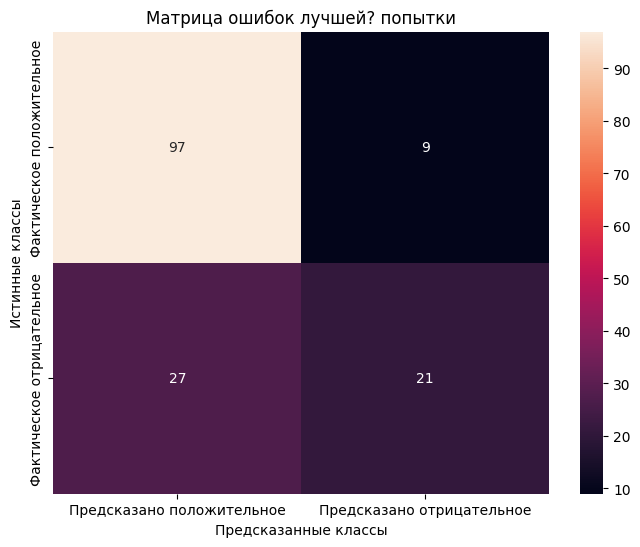

In [94]:
plt.figure(figsize=(8, 6))
sns.heatmap(results_fixed_z[1][1], annot=True, fmt='d', 
            xticklabels=["Предсказано положительное", "Предсказано отрицательное"],
            yticklabels=["Фактическое положительное", "Фактическое отрицательное"])
plt.ylabel('Истинные классы')
plt.xlabel('Предсказанные классы')
plt.title('Матрица ошибок лучшей? попытки')
plt.show()

При это стоит добавить, что в медицине лучше поставить здоровому пациенту, что он болен и перепроверить его ещё раз, нежели больному пациенту поставить, что он здоров. Тогда следует искать матрицу ошибок по другой логике.

In [86]:
results_fixed_z

[(3,
  array([[94, 12],
         [28, 20]]),
  np.float64(0.7402597402597403)),
 (5,
  array([[97,  9],
         [27, 21]]),
  np.float64(0.7662337662337663)),
 (10,
  array([[101,   5],
         [ 33,  15]]),
  np.float64(0.7532467532467533))]

In [87]:
results_fixed_m


[(3,
  array([[61, 45],
         [28, 20]]),
  np.float64(0.525974025974026)),
 (5,
  array([[61, 45],
         [28, 20]]),
  np.float64(0.525974025974026)),
 (10,
  array([[61, 45],
         [28, 20]]),
  np.float64(0.525974025974026))]

In [88]:
results_fixed_r

[(3,
  array([[88, 18],
         [27, 21]]),
  np.float64(0.7077922077922078)),
 (5,
  array([[91, 15],
         [26, 22]]),
  np.float64(0.7337662337662337)),
 (10,
  array([[99,  7],
         [30, 18]]),
  np.float64(0.7597402597402597))]

С точки зрения медика - опять же лучшее распределение оказалось Z-score с k=10.

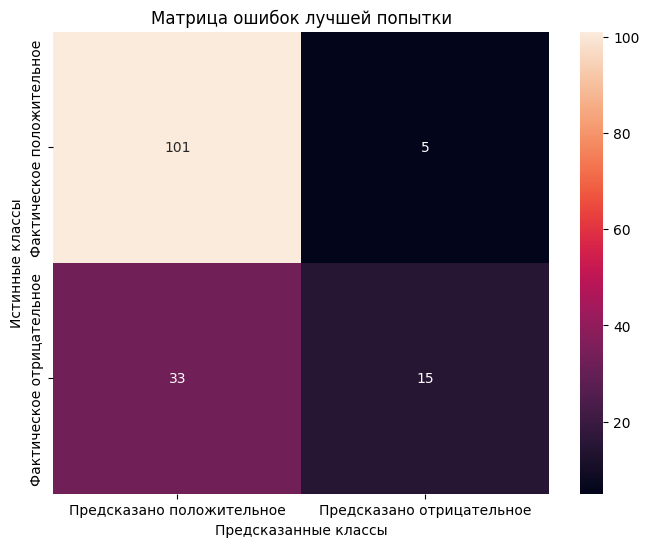

In [92]:
plt.figure(figsize=(8, 6))
sns.heatmap(results_fixed_z[2][1], annot=True, fmt='d', 
            xticklabels=["Предсказано положительное", "Предсказано отрицательное"],
            yticklabels=["Фактическое положительное", "Фактическое отрицательное"])
plt.ylabel('Истинные классы')
plt.xlabel('Предсказанные классы')
plt.title('Матрица ошибок лучшей попытки')
plt.show()